# Поиск по сетке
---
Можно перебирать комбинации гиперпараметров с помощью поиска по сетке (grid). Линейные модели достаточно просты, и у них даже есть свои специализированные версии поиска значений параметров. Но также, можно использовать обобщённый метод поиска по сетке - grid search. Этот метод применим для любой модели в sklearn, и он пригодится позже для более сложных моделей.

Сложные модели, как правило, имеют несколько гиперпараметров. Поиск по сетке - это способ обучения и оценки работы модели для различных комбинаций значений гиперпараметров.

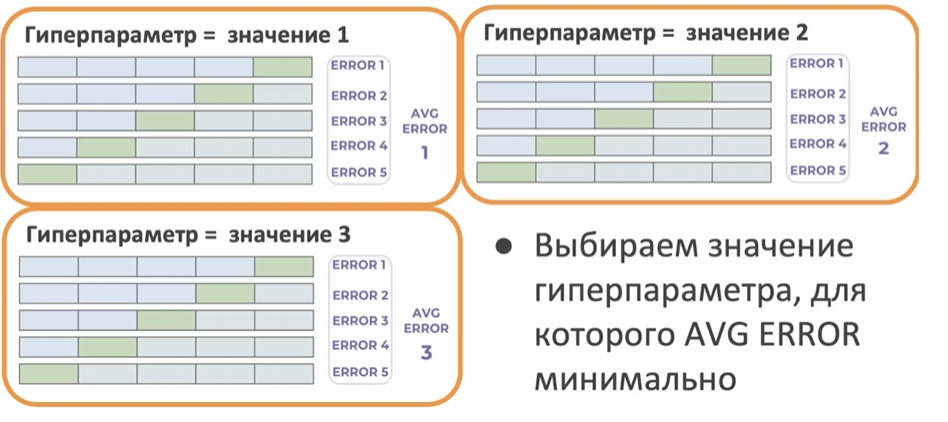

Для найденного оптимального значения гиперпараметра было сделано пять различных разбиений данных, в итоге - было получено пять различных моделей, которые имеют разные коэффициенты, потому что эти пять моделей обучались на различных частях данных.

Как выбрать лучшую из этих моделей? Можно взять найденое оптимальное значение гиперпараметра, после чего обучить модель на всех данных Train - это все данные кроме Test, которые мы отложили в сторону. Получается, что кросс-валидация позволила выбрать такое значение гиперпараметра, для которого средняя ошибка минимальна на различных разбиениях данных, при этом все данные Train - поучаствовали как в обучении модели, так и в валидации + остались данные Test, для финальной проверки модели.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('../DATA/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Создаем X и y

In [10]:
# axis=1 для колонок
X = df.drop('sales', axis=1)
y = df['sales']

### Разбиваем данные на обучающий и тестовый наборы - Train | Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Масштабирование данных - Scale

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Создаем модель

In [26]:
from sklearn.linear_model import ElasticNet

In [28]:
help(ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alph

**Задача - найти такие значения гиперпараметров, для которых метрика ошибки будет иметь минимальное значение**

In [31]:
# Не будем указывать значения гиперпараметров
base_elastic_net_model = ElasticNet()

### Поиск по сетке - Grid Search
Такой поиск состоит из следующих составляющих:
* Функция оценки - estimator(pregressor или classifier, например sklearn.svm.SVC())
* Пространство параметров
* Метод поиска или сэмплирования кандидатов
* Схема кросс-валидации
* Функция оценки (score function)

In [34]:
param_grid = {'alpha':[0.1, 1, 5, 50, 100], 
              'l1_ratio':[.1, .5, .7, .95, .99, 1]}

In [36]:
from sklearn.model_selection import GridSearchCV

`verbose` - отвечает за вывод детальной информации на экран за время выполнения метода. Чем больше это значение - тем больше информации будет выводиться. Может быть полезно в тех случаях, когда поиск по сетке занимает длительное время, поскольку перебираются все комбинации гиперпараметров. 

В нашем примере указано пять значений для *alpha* и шесть значений для *l1_ratio*, получается 30 различных комбинаций.

In [47]:
grid_model = GridSearchCV(estimator=base_elastic_net_model, 
                          param_grid=param_grid, 
                          scoring='neg_mean_squared_error', 
                          cv=5, 
                          verbose=2)

### Обучаем созданную модель
Здесь метод `.fit()` выполнит три вещи:
1. Пройдет в цикле по всем комбинациям гиперпараметров
2. Для каждой конкретной комбинации гиперпараметров, выполнит  кросс-валидацию с разбиением данных на *k* частей
3. Выберет наилучшие значения гиперпараметров по указанной метрике и вернет на выходе обученную модель, которую можнобудет найти в одном из атрибутов.

In [49]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

### Выясняем какая модель получилась самая лучшая

In [52]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [54]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

### Если интересны другие результаты, кроме наилучших параметров

In [57]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020943,0.040890,0.000691,0.000390,0.1,0.10,"{'alpha': 0.1, 'l1_ratio': 0.1}",-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,6
1,0.000402,0.000367,0.000199,0.000399,0.1,0.50,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,5
2,0.000597,0.000488,0.000499,0.000444,0.1,0.70,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.269880,-1.442432,-5.502437,-2.163950,-4.356738,-3.347088,1.462765,4
3,0.000199,0.000399,0.000399,0.000489,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-3.213052,-1.472417,-5.396258,-2.177452,-4.241080,-3.300052,1.406248,3
4,0.000408,0.000376,0.000602,0.000371,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-3.208124,-1.478489,-5.380242,-2.181097,-4.222968,-3.294184,1.396953,2
5,0.000199,0.000399,0.000786,0.000394,0.1,1.00,"{'alpha': 0.1, 'l1_ratio': 1}",-3.206943,-1.480065,-5.376257,-2.182076,-4.218460,-3.292760,1.394613,1
6,0.000601,0.000369,0.000202,0.000404,1.0,0.10,"{'alpha': 1, 'l1_ratio': 0.1}",-9.827475,-5.261525,-11.875347,-7.449195,-8.542329,-8.591174,2.222939,12
7,0.001018,0.000047,0.000102,0.000205,1.0,0.50,"{'alpha': 1, 'l1_ratio': 0.5}",-8.707071,-4.214228,-10.879261,-6.204545,-7.173031,-7.435627,2.255532,11
8,0.000699,0.000396,0.000301,0.000399,1.0,0.70,"{'alpha': 1, 'l1_ratio': 0.7}",-7.920870,-3.549562,-10.024877,-5.379553,-6.324836,-6.639940,2.206213,10
9,0.000300,0.000397,0.000807,0.000404,1.0,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-6.729435,-2.591285,-8.709842,-4.156317,-5.329916,-5.503359,2.102835,9


### Оценка полученной модели
Если результаты нас устраивают

In [60]:
y_pred = grid_model.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error

In [64]:
MSE = mean_squared_error(y_test, y_pred)
MSE

2.3873426420874737

Мы получили финальную оценку работы нашей модели.

---

# Случайный поиск - Random Search
Для примера с поиском по сетке мы использовали два параметра *alpha* - с пятью значениями и *l1_ratio* - с шестью значениями. В итоге, общее количество комбинаций составляет 30.

Что будет, если число перебираемых значений увеличится:

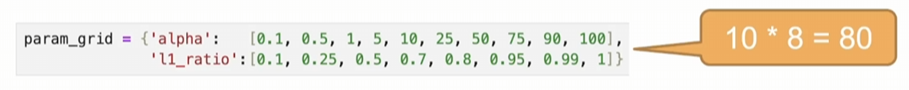

Общее количество комбинаций начинает расти.

Если же увеличится не только число перебираемых значений, но и количество гиперпараметров:

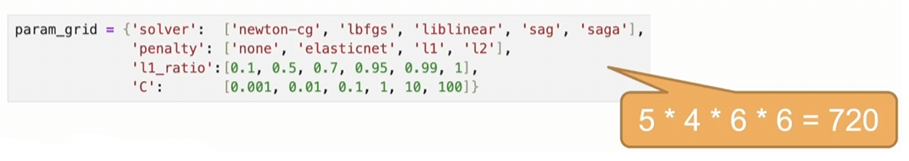

То рост количества комбинаций будет ещё больше.

Для перебора всех этих комбинаций потребуется много времени и много вычислительных ресурсов. Вопрос - можно ли сократить трудоёмкость этого процесса? Одним из способов, в таком случае, будет являться использование случайного поиска.

## Как работает случайный поиск

Для использования случайного поиска используется класс `RandomizedSearchCV(n_iter=..., random_state=...)`. Здесь почти всё то же самое что и в случае `GridSearchCV`, но также есть параметр `n_iter`, который отвечает за количество итераций, кроме того есть параметр `random_state` - для того, чтобы сделать случайные результаты воспроизводимыми.

Мы делаем не полный перебор всех комбинаций, а берём только некоторые комбинации и делаем это случайным образом. Также можно сами значения гиперпараметров брать не фиксированные, а случайные - можно указать некоторое распределение для каждого гиперпараметра:

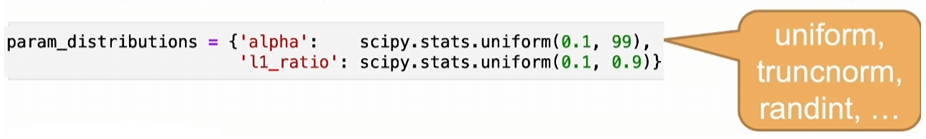

Можно взять равномерное распределение, нормальное распределение, целочисленное равномерное распределение и другие.

## Преимущество случайного поиска

Рассмотрим в качестве примера два гиперпараметра и нарисуем график, на котором изображены результаты работы модели для различных значений гиперпараметров:

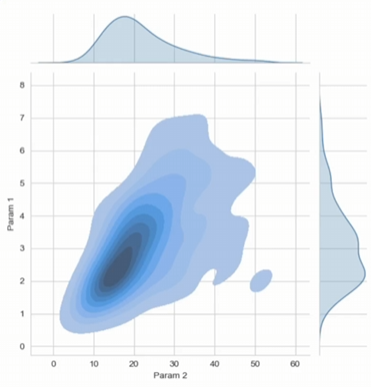

На этом графике самый темный цвет - самые оптимальные значения гиперпараметров, которые мы хотим найти. Если для поиска применить сетку `GridSearch` для значений(три по горизонтали, четыре по вертикали), то мы получим сетку из 12 комбинаций гиперпараметров и это будет равномерная сетка:

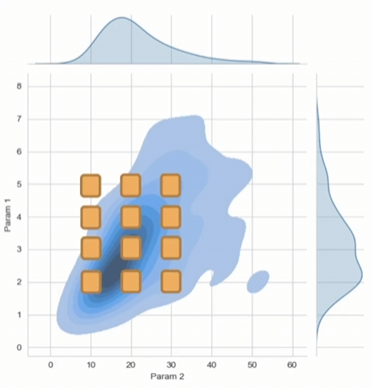

Для тех же значений вместо равномерной сетки, возьмем Random Search:

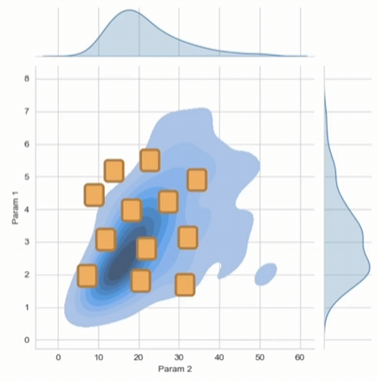

Что лучше работает? В данном пример трудно ответить на этот вопрос, однако в нем оба гиперпараметра важные - и по вертикали, и по горизонтали нужно найти некоторое оптимальное значение, а это не всегда так. Например, на графике:

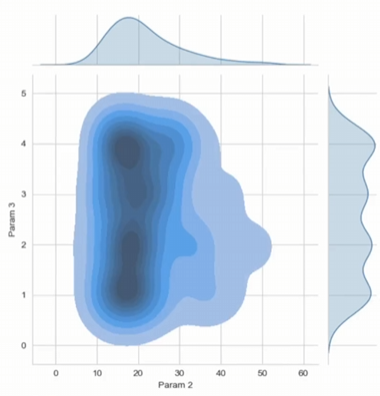

По вертикали отложен такой гиперпараметр, значения которого практически не влияют на результат работы модели. По горизонтали же, отложен важный гиперпараметр, для которого важно найти тот небольшой диапазон значений, где модель работает оптимально.

В таком случае, для фиксированной сетки `GridSearch` и для `RandomSearch` получим следующие результаты:

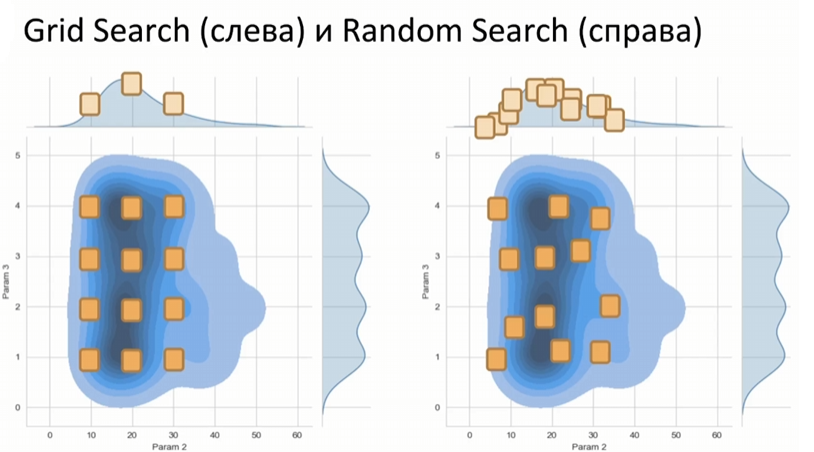

На левом графике, для признака расположенного по горизонтали мы перебираем три значения, в то время как на правом графике для того же признака мы перебираем больше значений. Таким образом мы повышаем вероятность того, что для важного гиперпараметра мы точнее приблизимся к оптимальной точке.

Если бы гиперпараметр по вертикали тоже был бы важен, то мы бы по прежнему получили 12 значений для гиперпараметра по горизонтали, однако их можно было рассматривать не отдельно, а только в комбинации с соседним гиперпараметром. В отличие от этого, здесь, поскольку важен только один гиперпараметр, то все 12 различных значений имеют равные шансы для того, чтобы оптимизировать этот важный гиперпараметр по горизонтали. 

Благодаря этому эффекту, случайный поиск может работать более эффективно, чем поиск по фиксированной сетке.

## Итоги

`GridSearch` является более предсказуемым, если хватает вычислительных ресурсов для полного перебора всех комбинаций гиперпараметров, то его вполне можно использовать.

Если вычислительных ресурсов не хватает, то можно переключиться на `RandomSearch`. Он более эффективен при ограниченных вычислительных ресурсах.

---